![Header.jpeg](attachment:5bdc40d4-66e1-4a6f-8b96-4e418a7f499e.jpeg)

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist.

### Pertemuan 4 - Semester 3


In [5]:
# Import library pandas
import pandas as pd

In [7]:
# Muat dataset
df = pd.read_csv('kepuasan_pelanggan_maskapai.csv')

In [ ]:
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
1,43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
2,32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10390 entries, 0 to 10389
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10390 non-null  int64  
 1   id                                 10390 non-null  int64  
 2   Gender                             10390 non-null  object 
 3   Customer Type                      10390 non-null  object 
 4   Age                                10390 non-null  int64  
 5   Type of Travel                     10390 non-null  object 
 6   Class                              10390 non-null  object 
 7   Flight Distance                    10390 non-null  int64  
 8   Inflight wifi service              10390 non-null  int64  
 9   Departure/Arrival time convenient  10390 non-null  int64  
 10  Ease of Online booking             10390 non-null  int64  
 11  Gate location                      10390 non-null  int

In [9]:
# 1. Import library matplotlib
import matplotlib.pyplot as plt

In [10]:
# 2. Buatlah list untuk menampung kode HEX warna yang akan dipakai di pie chart
# Berikut list kode HEX-nya : #EC6B56, #FFC154, #47B39C
colors = ["#EC6B56", "#FFC154", "#47B39C"]

In [11]:
# 3. Melihat jumlah data pada kolom kelas dengan .value_counts()
class_count = df["Class"].value_counts()
class_count

,count
Class,
Business,5049
Eco,4570
Eco Plus,771


In [13]:
# 4. Membuat variabel untuk menampung index dari kolom kelas
class_labels = class_count.index

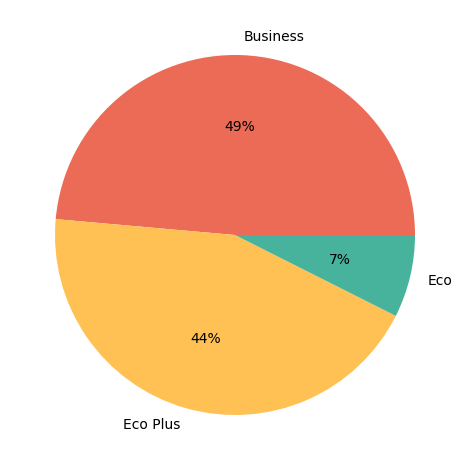

In [16]:
# 5. Melihat pesebaran data pada kolom kelas penerbangan dengan pie chart
plt.pie(df["Class"].value_counts(),
        labels = ["Business","Eco Plus","Eco"],
        colors = colors,
        autopct = '%1.0f%%') # Corrected indentation for autopct
plt.tight_layout()
plt.show()

In [17]:
# 6.Membuat variabel untuk menampung jumlah jenis kelamin
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Female,5273
Male,5117


In [18]:
# 7. Membuat list dengan isi kode HEX warna yang akan dipakai
# Berikut list kode warnanya "#3C3B6E", "#B22234"
gender_colors = ["#3C3B6E", "#B22234"]

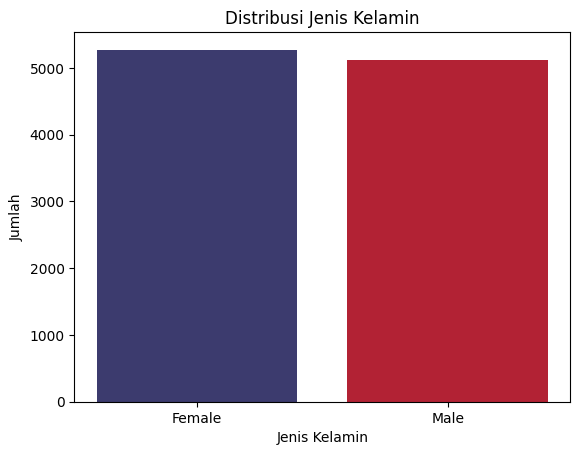

In [19]:
# 8. Membuat bar chart untuk melihat jumlah jenis kelamin dengan library matplotlib
plt.bar(gender_counts.index,
        gender_counts.values,
        color=gender_colors) # Mengatur warna bar
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.title("Distribusi Jenis Kelamin") # Added a title for better clarity
plt.show()

In [20]:
# 9. Import library Seaborn
import seaborn as sns

In [21]:
custom_palette = {"satisfied": "#279C86", "neutral or dissatisfied": "#C80537"}

<Axes: xlabel='count', ylabel='Gender'>

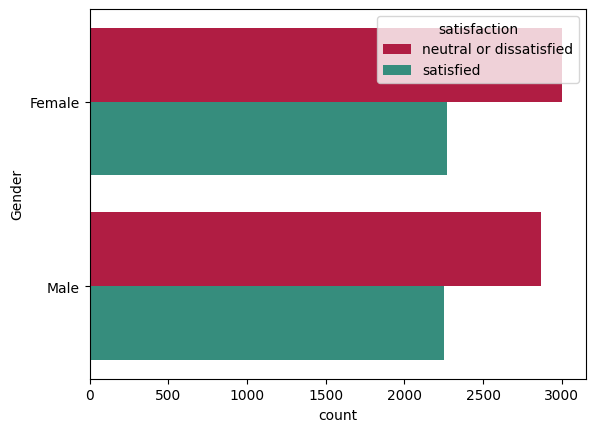

In [22]:
# 10. Membuat horizontal bar chart untuk melihat tingkat kepuasan berdasarkan jenis kelamin dengan library Seaborn
sns.countplot(y='Gender',
              hue='satisfaction',
              data=df,
              palette=custom_palette)# Mengatur palet warna yang akan digunakan

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

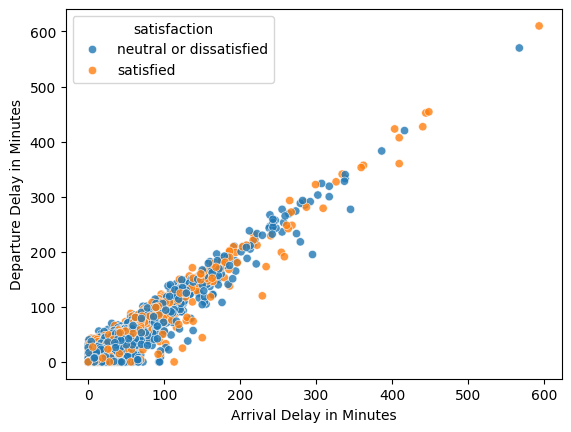

In [38]:
# 11. Buatlah scatterplot untuk melihat hubungan linier antara Arrival Delay & Departure
sns.scatterplot(x="Arrival Delay in Minutes", y="Departure Delay in Minutes"
                ,hue='satisfaction', data=df, alpha=0.8)

In [35]:
# Membuat variabel df_1 untuk menampung beberapa kolom
df_1 = df[['Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']]

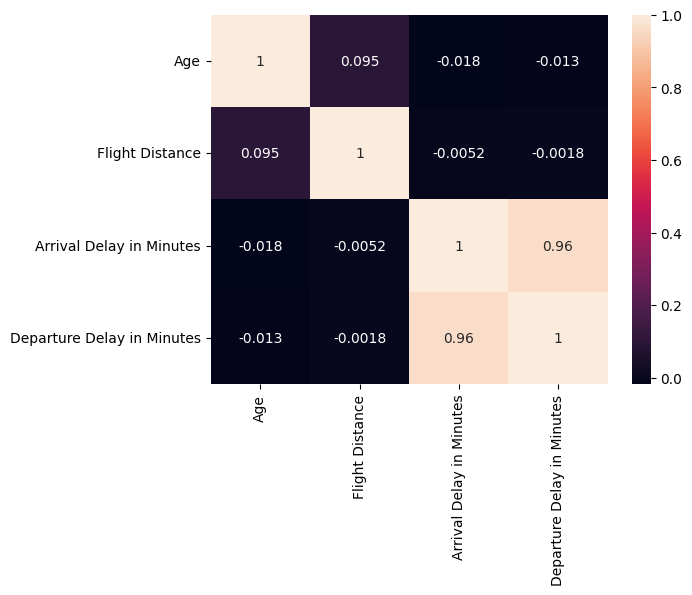

In [39]:
# 12. Membuat heatmap dari variabel df_1 dan dengan anotasi
sns.heatmap(df_1.corr(), annot=True)
plt.show()

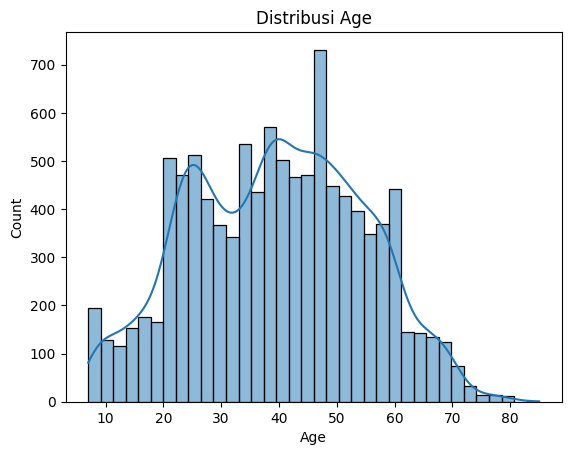

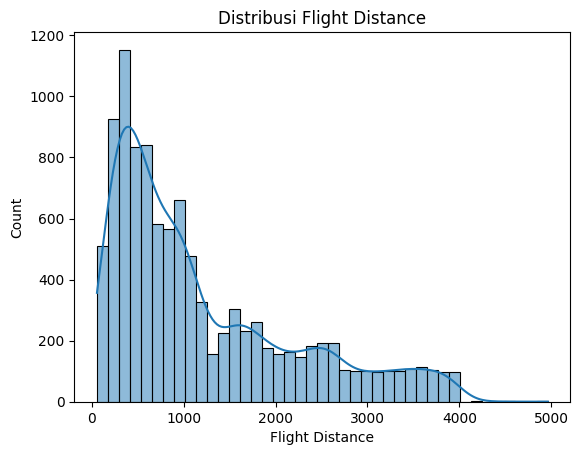

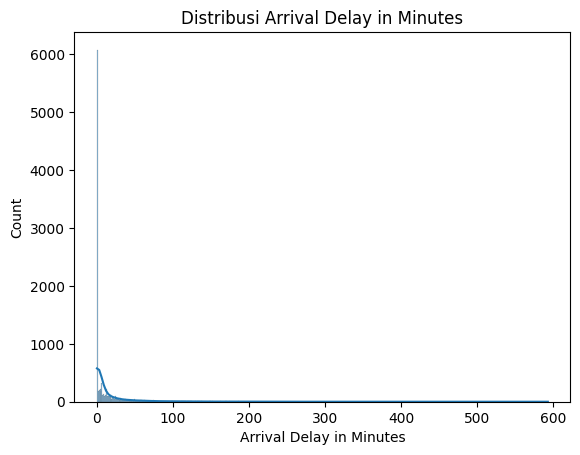

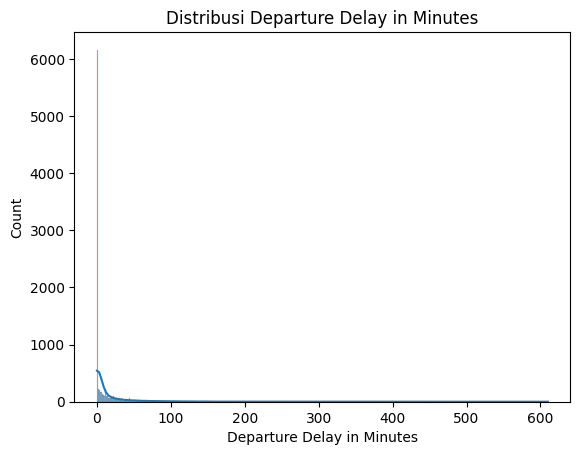

In [40]:
# 13. Membuat histogram dengan library Seaborn dari setiap kolom pada variabel df_1
for column in df_1.select_dtypes(include=['int64', 'float64']):
    sns.histplot(data=df_1, x=column, kde=True)
    plt.title(f'Distribusi {column}') # f-string for dynamic title
    plt.show()

In [41]:
# Menghapus data yang kosong / NaN
df_cleaned = df.dropna()

In [47]:
# 14. Hitung korelasi pearson dan nilai p dari kolom "cleanliness" dan "food and drink"

import scipy.stats
print(df.columns)
df_1 = df[['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Cleanliness', 'Inflight entertainment']]
pears_corr, p_value = scipy.stats.pearsonr(df_1["Cleanliness"], df_1["Inflight entertainment"])

print(f"Pearson correlation: {pears_corr}")
print(f"P-value: {p_value}")

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Pearson correlation: 0.697272242877701
P-value: 0.0


In [48]:
# 15. Mencetak nilai korelasi pearson dan nilai p
print("Korelasi Pearson:", pears_corr)
print("Nilai p:", p_value)

Korelasi Pearson: 0.697272242877701
Nilai p: 0.0


In [49]:
# Melihat deskripsi statistik dari semua tipe kolom
df.describe(include="all")

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10390.000000,10390.000000,10390,10390,10390.000000,10390,10390,10390.000000,10390.000000,10390.000000,...,10390.000000,10390.000000,10390.000000,10390.000000,10390.00000,10390.000000,10390.000000,10390.000000,10362.000000,10390
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,5273,8518,NaN,7216,5049,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5867
mean,51313.040712,64196.068239,NaN,NaN,39.512993,NaN,NaN,1193.684986,2.710106,3.051107,...,3.381424,3.369779,3.332435,3.643407,3.29538,3.647064,3.302502,14.564100,14.878691,NaN
std,29842.890503,37502.362045,NaN,NaN,15.022586,NaN,NaN,998.764008,1.330931,1.519719,...,1.339674,1.295843,1.318029,1.179273,1.27356,1.176943,1.321255,36.584938,37.009856,NaN
min,23.000000,9.000000,NaN,NaN,7.000000,NaN,NaN,56.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,NaN
25%,25476.250000,32049.750000,NaN,NaN,27.000000,NaN,NaN,416.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,2.00000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51236.000000,63603.000000,NaN,NaN,40.000000,NaN,NaN,857.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.00000,4.000000,3.000000,0.000000,0.000000,NaN
75%,76913.750000,96679.250000,NaN,NaN,51.000000,NaN,NaN,1733.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,5.000000,4.00000,5.000000,4.000000,12.000000,13.000000,NaN


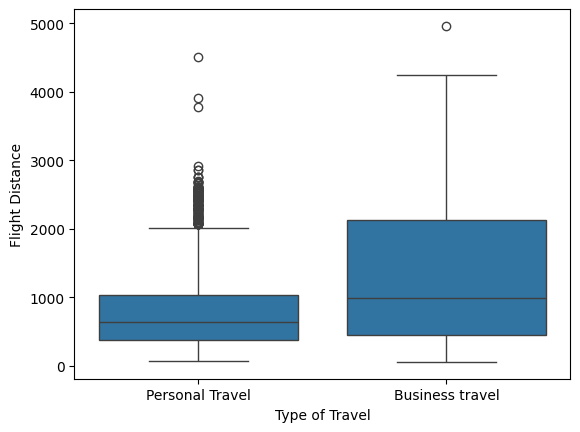

In [50]:
# 16. Membuat boxplot dari kolom Tipe Travel & Jarak Penerbangan
sns.boxplot(x="Type of Travel", y="Flight Distance", data=df)
plt.show()

In [51]:
# 17.Buatlah variabel untuk menampug kolom tipe penerbangan dan jarak penerbangan
travel_type_flight_dist = df[["Type of Travel", "Flight Distance"]]

In [52]:
travel_type_flight_dist

,Type of Travel,Flight Distance
0,Personal Travel,861
1,Business travel,393
2,Personal Travel,196
3,Personal Travel,1020
4,Business travel,1117
...,...,...
10385,Business travel,351
10386,Business travel,3825
10387,Business travel,872
10388,Business travel,3000


In [53]:
# 18. Buat variabel untuk menampung tipe penerbangan bisnis
business_flight_dist = travel_type_flight_dist[travel_type_flight_dist['Type of Travel'] == 'Business travel']['Flight Distance']
business_flight_dist

,Flight Distance
1,393
4,1117
7,546
9,1813
10,3391
...,...
10385,351
10386,3825
10387,872
10388,3000


In [54]:
# 19 Buat variabel untuk menampung tipe penerbangan personal
personal_flight_dist = travel_type_flight_dist[travel_type_flight_dist['Type of Travel'] == 'Personal Travel']['Flight Distance']
personal_flight_dist

,Flight Distance
0,861
2,196
3,1020
5,1199
6,925
...,...
10363,1047
10364,280
10369,319
10377,1846


In [55]:
# 20. Hitung ANOVA

# Import library scipy.stats
from scipy.stats import f_oneway

# Perform ANOVA test
f_val, p_val = f_oneway(business_flight_dist, personal_flight_dist)
alpha = 0.05  # tingkat signifikansi

# Print results
print("Nilai F-statistic:", f_val)
print("Nilai p-value:", p_val)

# Check for significance
if p_val < alpha:
    print("Terdapat perbedaan yang signifikan di antara setidaknya dua kelompok.")
else:
    print("Tidak terdapat perbedaan yang signifikan di antara kelompok-kelompok.")

Nilai F-statistic: 809.5126483524101
Nilai p-value: 1.5598678811248436e-171
Terdapat perbedaan yang signifikan di antara setidaknya dua kelompok.


---

Copyright © 2024 by Tim Pengembangan DGX, Universitas Gunadarma


https://www.hpc-hub.gunadarma.ac.id/